In [1]:
# https://www.kaggle.com/dragonheir/logistic-regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
train = data.iloc[:,1:-1].values
result = data.iloc[:,-1].values

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
data.shape

(400, 5)

In [7]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
data['Purchased'].value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

<AxesSubplot:>

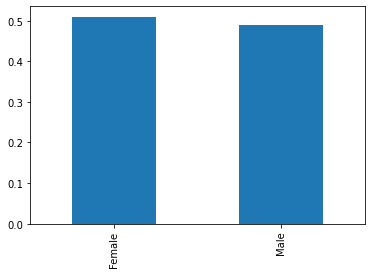

In [9]:
data['Gender'].value_counts(normalize=True).plot.bar()

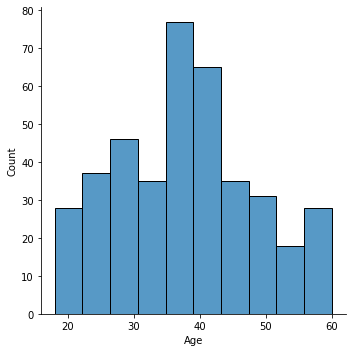

In [10]:
sns.displot(data['Age'])

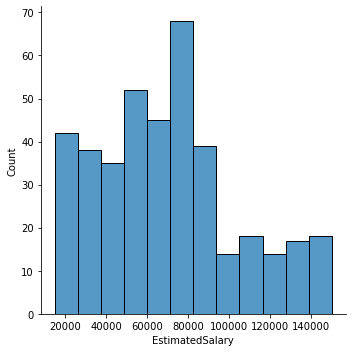

In [11]:
sns.displot(data['EstimatedSalary'])

<AxesSubplot:xlabel='Gender'>

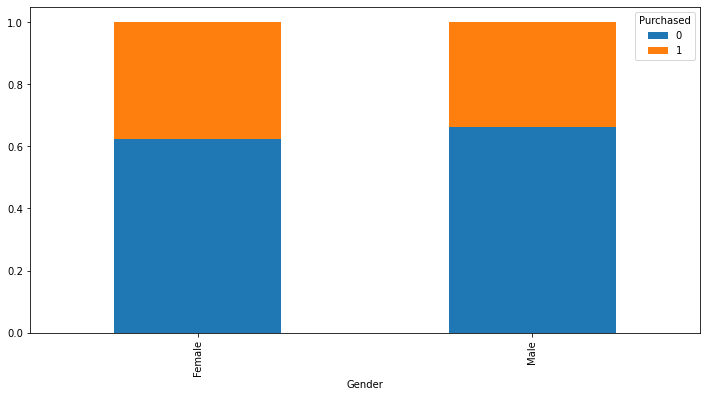

In [12]:
Gender = pd.crosstab(data['Gender'],data['Purchased'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(12,6))

<AxesSubplot:title={'center':'Age'}, xlabel='Purchased'>

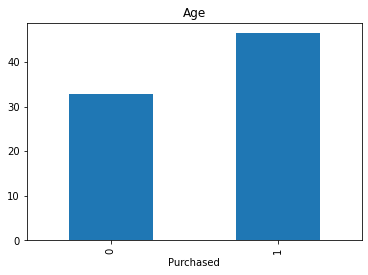

In [13]:
data.groupby('Purchased')['Age'].mean().plot.bar(title="Age")

<AxesSubplot:title={'center':'EstimatedSalary'}, xlabel='Purchased'>

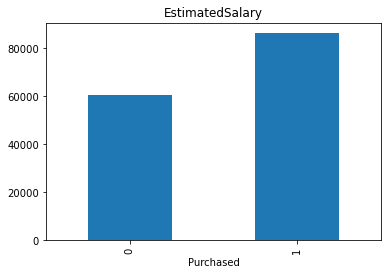

In [14]:
data.groupby('Purchased')['EstimatedSalary'].mean().plot.bar(title='EstimatedSalary')

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train[:,0] = le.fit_transform(train[:,0]) 

print(train)

[[1 19 19000]
 [1 35 20000]
 [0 26 43000]
 ...
 [0 50 20000]
 [1 36 33000]
 [0 49 36000]]


In [16]:
from sklearn.model_selection import train_test_split
data_tr, data_te, result_tr, result_te = train_test_split(train, result, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = data_tr
X_test = data_te
X_train[:, 1:] = sc.fit_transform(data_tr[:, 1:])
X_test[:, 1:] = sc.transform(data_te[:, 1:])

In [17]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, result_tr)

LogisticRegression(random_state=0)

In [18]:
pred = classifier.predict(X_test)

print(pred)
print(result_te)

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(result_te, pred) 

print ("Confusion Matrix : \n", cm) 

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]
Confusion Matrix : 
 [[56  2]
 [ 5 17]]


In [19]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(result_te, pred)) 

Accuracy :  0.9125
